## Graphing Sentiment

<IPython.core.display.Javascript object>


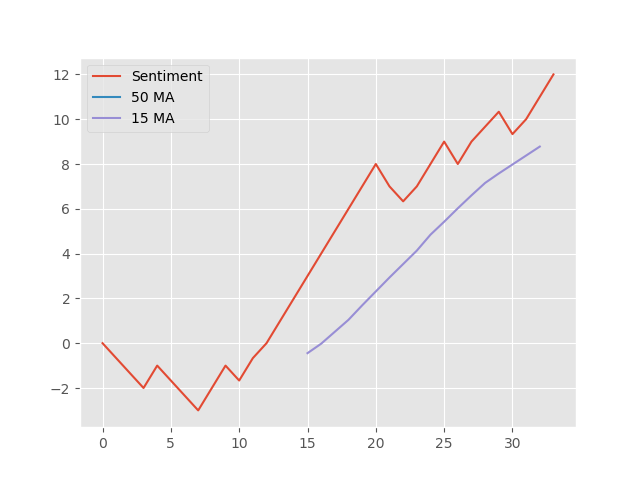

In [6]:
# run this cell while running the last cell in Twitter_NLP.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter_nlp.txt","r").read()
    prob_diff = (pullData.split('\n'))
    X = [0] # X array 
    Y = [0] # y array
    x = 0 # x counter
    
    MA_15 = np.zeros(15)    
    MA_50 = np.zeros(50)    
    
    for i, prob in enumerate (prob_diff[:-1]):
        x +=1
        Y.append(float(prob)+ Y[-1])
        X.append(x)
        if i>14: 
            MA_15 = np.append(MA_15, sum(Y[-15:])/15 ) # calculates the 15 simple MA.
        if i>49: 
            MA_50 = np.append(MA_50, sum(Y[-50:])/50 ) # calculates the 50 simple MA.
 
    
    ax.clear()
    ax.plot(X,Y, label='Sentiment')
    ax.plot(X[50:-1], MA_50[50:], label='50 MA') 
    ax.plot(X[15:-1], MA_15[15:], label='15 MA') 
    ax.label_outer()
    ax.legend()
    
ani = animation.FuncAnimation(fig, animate) # makes an animation by repeatedly calling the function animate.
plt.show()